In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

import warnings
warnings.simplefilter('ignore')

In [270]:
plt.rcParams['figure.figsize'] = 5, 5
plt.rcParams['font.family'] = 'DejaVu Serif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['axes.labelsize'] = 8

In [537]:
def fill_with_rand_from_col(data):
    df = data.copy()
    for name in list(df):
        all_not_na = df[df[name].notna()][name].to_numpy()
        to_fill = df[df[name].isna()][name].index
        df[name][to_fill] = np.random.permutation(all_not_na)[:len(to_fill)]
    return df

Full = pd.read_csv('data.csv', delimiter =';', decimal=',')
weights = pd.read_csv('weights.csv', delimiter =';', decimal=',')

Full_fill = fill_with_rand_from_col(Full.drop(['Объект'], axis=1))
weights_fill= fill_with_rand_from_col(weights.drop(['Признаки'], axis=1))

# for elem in list(Full_fill)[5:]:
#     Full_fill[elem] = Full_fill[elem].apply(lambda x: 1/x)

prob_df = Full_fill.copy()

for name in list(prob_df)[:5]:
    density = scipy.stats.gaussian_kde(Full_fill[name])
    dx = Full_fill[name].std()/10
    for i in range(len(prob_df)):
        x = Full_fill[name][i]
        p = 0
        if x - dx < 0:
            l = 0
        else:
            l = x - dx
        r = x + dx

        xs = np.linspace(l,r,100)
        y = density(xs)
        for j in range(len(xs)-1):
            p+=y[j] * (xs[j+1]-xs[j])
            
        prob_df.loc[i, name] = p

In [538]:
A = prob_df.to_numpy()
w_0 = weights_fill.mean(axis = 1).to_numpy()/weights_fill.max(axis = 1).to_numpy()
q_median = Full_fill[list(Full_fill)[5:]].median(axis = 1).to_numpy()

from sklearn.neighbors import NearestNeighbors

X = A[:,5:].T

nbrs = NearestNeighbors(n_neighbors=1).fit(X)
distances, indices = nbrs.kneighbors(np.array([q_median]))
index = indices[0,0]

q0 = X[index]

g = 0.9
I = np.diag(np.ones(A.shape[1]))
w_g = np.linalg.inv(((A.T @ A) - g*I))
w_g = w_g @ (A.T @ q0 + g * w_0)

ind = A @ w_g.T

In [539]:
Rating = pd.DataFrame()
Rating['Weight'] = ind
Rating = Rating.sort_values('Weight',ascending=False)
Final_rating = np.array(Rating.index+1)

In [540]:
IndMean = (1/Full_fill[list(Full_fill)[5+index]])

In [541]:
Full

,Объект,"Калорийность, кКал","Цена 100г, руб.",Белки,Жиры,Углеводы,Стрижов,Гребенькова,Михеев,Тихонов,Панченко,Панкратов,Харь,Савельев,Исламов,Волынцев,Христолюбов,Алсаханова
0,Устрицы,72.0,85.0,9.0,2.0,4.4,4.0,NaN,NaN,NaN,9,5.0,NaN,NaN,NaN,NaN,3.0,9
1,Арахиc соленый,640.0,69.0,25.0,52.0,17.0,2.0,6.0,4.0,8.0,7,4.0,3.0,3.0,NaN,4.0,6.0,3
2,"Молоко 2,5%",42.0,5.9,3.4,2.5,5.0,5.0,1.0,5.0,5.0,4,3.0,8.0,4.0,2.0,3.0,5.0,5
3,Макароны,371.0,34.0,3.6,0.4,20.0,7.0,7.0,2.0,3.0,2,8.0,4.0,6.0,3.0,5.0,NaN,6
4,Овсяное молоко 3.2%,250.0,8.0,1.0,3.2,6.5,NaN,2.0,7.0,2.0,6,7.0,5.0,5.0,7.0,NaN,7.0,7
5,Шоколад,545.0,100.0,5.0,33.0,56.5,3.0,4.0,1.0,9.0,5,NaN,1.0,1.0,6.0,6.0,1.0,2
6,"Сырок ""РОСТАГРОЭКСПОРТ"" творожный глазированны...",360.7,35.6,7.7,19.1,39.5,NaN,3.0,3.0,NaN,1,2.0,6.0,2.0,1.0,1.0,2.0,8
7,Кефир 3.2%,57.0,5.9,3.0,3.2,4.0,6.0,5.0,8.0,4.0,8,1.0,7.0,7.0,4.0,7.0,NaN,1
8,Гречневая крупа,334.0,4.0,12.0,2.0,67.0,1.0,8.0,6.0,1.0,3,6.0,2.0,8.0,5.0,2.0,4.0,4


In [542]:
Final_rating

array([5, 8, 2, 4, 3, 9, 1, 7, 6])

In [543]:
q = [[9,4,5,6,7,1,2,8,3], [9,5,4,6,7,3,1,8,2], [9,5,3,6,8,2,1,7,4]]
inds = ['Григорьев Алексей','Панченко Святослав', 'Надежда Алсаханова']

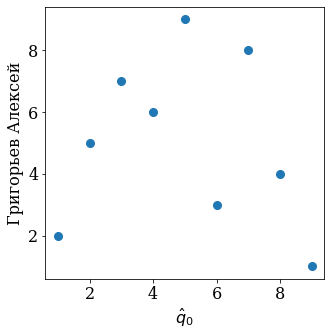

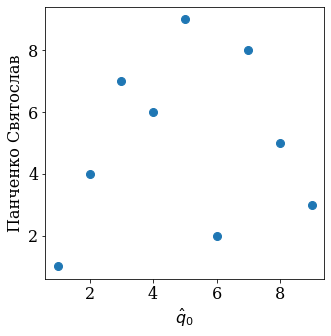

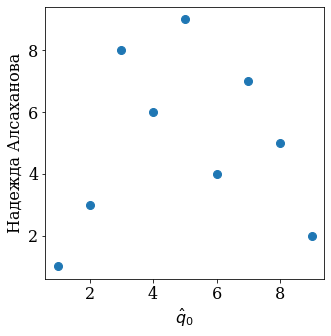

In [544]:

for i in range(len(q)):
    plt.plot(Final_rating, q[i], 'o')
    plt.ylabel(inds[i], size=16)
    plt.xlabel('$\hat{q}_0$', size=16)
    plt.savefig('../doc/fig/inds'+str(i)+'.eps',
                format='eps',
                dpi=600,
                bbox_inches='tight')
    plt.show()